# INTRODUÇÃO TÉCNICA A INTELIGÊNCIA ARTIFICIAL B!

-----------------------

## Métricas de Desempenho


### Exemplo Classificação Binária


Este exemplo consiste na Avaliação dos resultados de um problema de **Classificação Binária**. Utilizando
as métricas referentes a problemas de classificação binária:

 * Matriz de Confusão
 * Acurácia
 * Precisão
 * Recall
 * F1-Score
 
-----------------------
 
 **Problema** : 
 
  Investigaremos possíveis casos de doenças coronárias em pacientes, com base em diferentes variávies como, uso de tabaco, nível de colesterol Ldl, Uso de Álcool, Obesidade e outros. 
  
 > Dados forncedidos por um estudo feito na África do Sul, uma descrição mais completa sobre o problema pode ser encontrada [aqui](https://web.stanford.edu/~hastie/ElemStatLearn/).

-----------------------


In [1]:
# Carregar Pacotes

import io
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

-----------------------
### Carregando os Dados

In [2]:
df = pd.read_csv("dados_exe1.csv", header=0)
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
# Codificar valores categóricos da coluna "famhist" para inteiros

df["famhist"] = df["famhist"].astype('category')
df["famhist"] = df["famhist"].cat.codes
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


-----------------------
## Separar dados em Treino/Teste (70/30)

In [4]:
# separar dados
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

print("Tamanho do Dataset Completo {} Amostras".format(len(x)))
print("Classe '0' {} amostras | Classe '1' {} Amostras".format(y.value_counts()[0], y.value_counts()[1]))
print("")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20, shuffle=True)

print("Tamanho do Dataset Treino {} Amostras".format(len(x_train)))
print("Classe '0' {} amostras | Classe '1' {} Amostras".format(y_train.value_counts()[0], y_train.value_counts()[1]))
print("")
print("Tamanho do Dataset Teste {} Amostras".format(len(x_test)))
print("Classe '0' {} amostras | Classe '1' {} Amostras".format(y_test.value_counts()[0], y_test.value_counts()[1]))


Tamanho do Dataset Completo 462 Amostras
Classe '0' 302 amostras | Classe '1' 160 Amostras

Tamanho do Dataset Treino 323 Amostras
Classe '0' 216 amostras | Classe '1' 107 Amostras

Tamanho do Dataset Teste 139 Amostras
Classe '0' 86 amostras | Classe '1' 53 Amostras


Os dados apresentam um desbalanceamento de classes de proporção aproximada de 65:35 para classe 0.


-----
## Treinar o Classificador SVM

In [5]:
# modelo a ser utilizado
from sklearn import svm

model = svm.LinearSVC(max_iter=50, random_state=0)
model.fit(x_train, y_train)


LinearSVC(max_iter=50, random_state=0)

## Predição com dados de teste

In [6]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0], dtype=int64)

-----------
## Avaliar Desempenho do Classificador

### Matriz de Confusão

Confusion Matrix : 


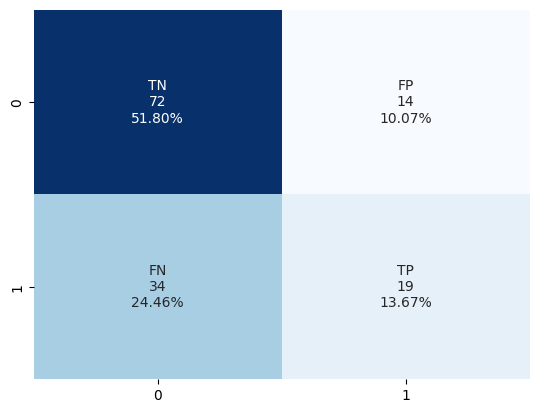

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn

cm = confusion_matrix(y_test, y_pred)

# obter contagens de observações
tn, fp, fn, tp = cm.ravel()

# Visualização da Matriz de Confusão
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
seaborn.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)

print("Confusion Matrix : ")

Como pode ser visto ao utilizar 50 iterações para o classificador, na matriz de confusão vemos que **48** das **139** observações foram classificadas erradas. 


O modelo não parece performar muito bem dentro destas condições. 


Vamos analisar as próximas métricas para vermos quais outras informações podemos extrair desta análise.  

### Acurácia    
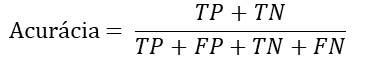

In [8]:
accuracy = (tp+tn)/(tp+fp+tn+fn)
print("Acurácia de {0:0.2f}%".format(accuracy*100))
     

Acurácia de 65.47%


Obtivemos uma Acurácia de **65.47%** um valor relativamente alto quando levamos em conta que para uma classe tivemos um resultado muito melhor do que na outra. 


Como os dados apresentam um desbalanceamento entre as classes, olhar apenas a acurácia do modelo pode não representar o real desempenho do classificador.





### Precisão    
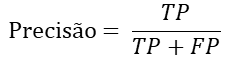

In [9]:
precision = (tp)/(tp+fp)
print("Precisão de {0:0.2f}%".format(precision*100))

Precisão de 57.58%


### Recall    
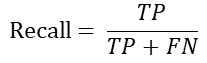

In [10]:
recall = (tp)/(tp+fn)
print("Recall de {0:0.2f}%".format(recall*100))

Recall de 35.85%


Um Baixo valor de Recall se remete a um alto número de falsos negativos, neste caso **24.46%**

O ideal são valores altos para ambos **Precisão** e **Recall**, onde o modelo performa bem para ambas as classes.

## F1-Score    
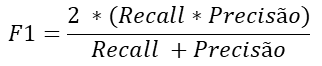

In [11]:
f1 = (2*precision*recall)/(recall+precision)
print("F1 - Score de {0:0.2f}%".format(f1*100))

F1 - Score de 44.19%


O **F1-Score** possui uma representação mais fiel do desemepenho do modelo, pois leva em consideração o número de Falsos Positivos e Falsos Negativos. 


Se tivéssemos avaliado apenas o valor de Ácuracia, poderíamos ter a impressão que o modelo apresenta um desempenho aceitável. Quando na verdade estaríamos validando um modelo que funciona muito bem apenas para a classe "0"


Um valor Baixo de **F1-Score** mostra que o modelo é inadequado para este problema. 


Saber avaliar o modelo em mais de uma métrica pode trazer insights interessantes e ajudar na tomada de decisão.


Desbalanceamento de Dados é um problema bem reccorente em aprendizado de máquina. Porém existem formas de lidar que involvem:

* Testar outros modelos Random Forests (RF), K-Nearest Neighbors (KNN), Artificial Neural Networks (ANN), etc...
* Usar comitês de máquinas
* Usar outras formas de reamostragem dos dados
* Usar Validação Cruzada